In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.left.value_counts()
## Imbalanced data set

0    11428
1     3571
Name: left, dtype: int64

In [16]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [62]:
## 
sns.set(rc={'figure.figsize':(11.7,8.27)})


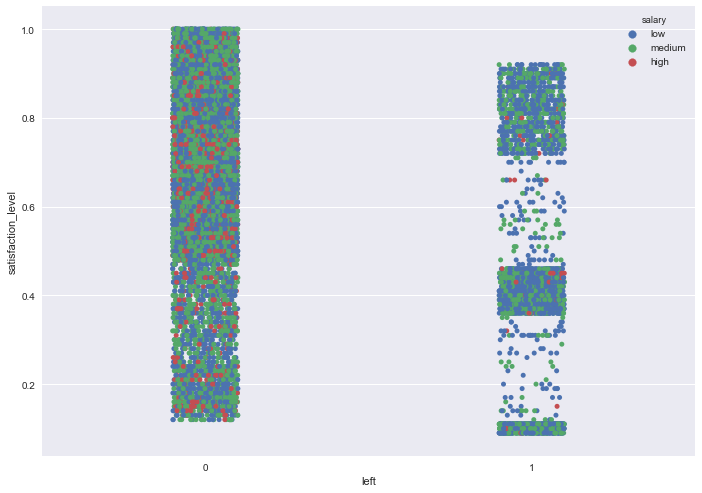

In [63]:
sns.stripplot(x = 'left',y ='satisfaction_level' , data = df, jitter= True , hue='salary')
plt.show()

In [56]:
df_left = df[df.left == 1]
df_remain = df[df.left == 0]
print( 'Percentage with high salary in the left category :' ,(df_left.salary=='high').sum()/df_left.shape[0] )
print( 'Percentage with medium salary in the left category :' ,(df_left.salary=='medium').sum()/df_left.shape[0] )
print( 'Percentage with low salary in the left category :' ,(df_left.salary=='low').sum()/df_left.shape[0] )

print( 'Percentage with high salary in the remaining category :' ,(df_remain.salary=='high').sum()/df_remain.shape[0] )
print( 'Percentage with medium salary in the remaining category :' ,(df_remain.salary=='medium').sum()/df_remain.shape[0] )

Percentage with high salary in the left category : 0.0229627555307
Percentage with medium salary in the left category : 0.368804256511
Percentage with low salary in the left category : 0.608232987959
Percentage with high salary in the remaining category : 0.101067553378
Percentage with medium salary in the remaining category : 0.448809940497


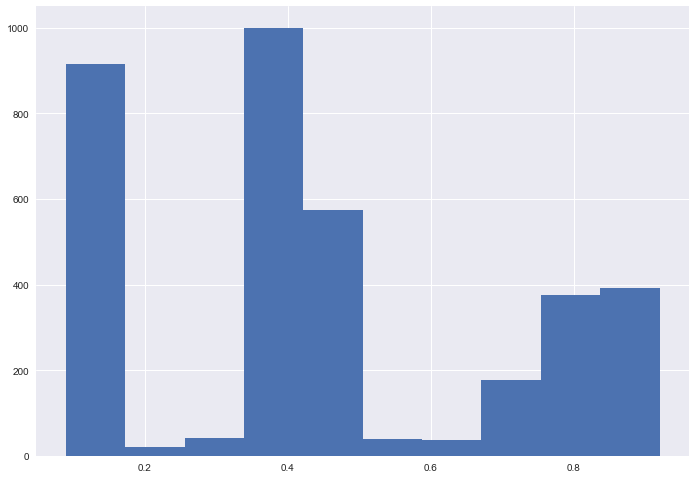

In [65]:
df_left.satisfaction_level.hist()
plt.show()

In [ ]:
## Analysis of Work Accidents 

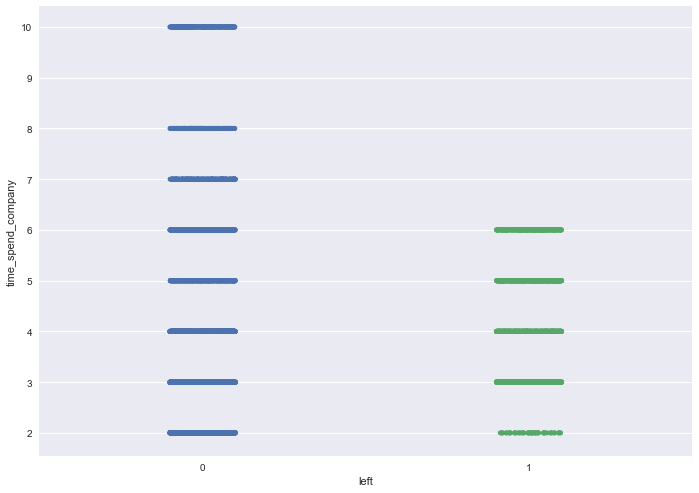

In [68]:
sns.stripplot(x = 'left',y ='time_spend_company' , data = df, jitter= True )
plt.show()

## People who have stayed longer in the company tend to stick ?

In [37]:
df_corr  =df [['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].corr()

In [38]:
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


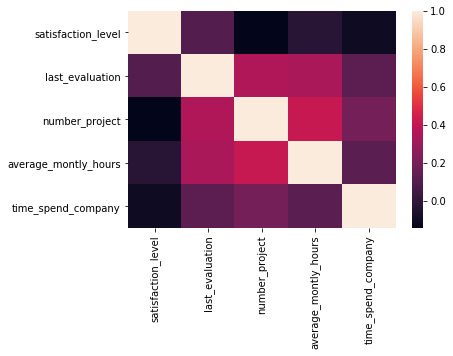

In [39]:
sns.heatmap(df_corr,);
plt.show()

In [ ]:
## Number of hours spent vs left

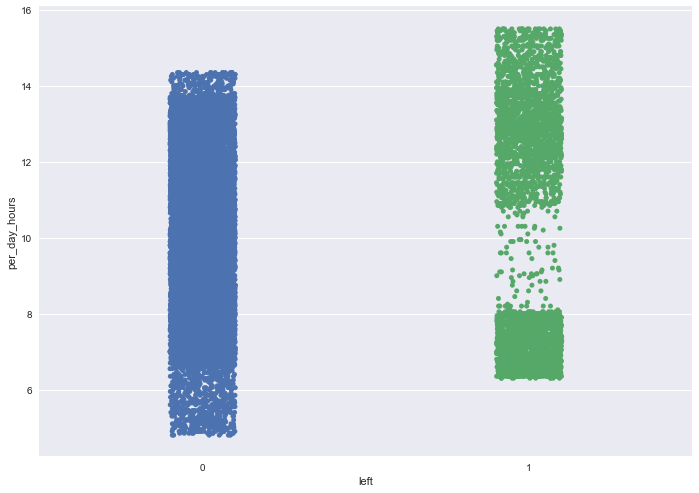

In [76]:
df['per_day_hours'] = df['average_montly_hours']/20
sns.stripplot(x = 'left',y ='per_day_hours' , data = df, jitter= True )
plt.show()
## Average hours spent per day in more by people who have left, could notice period policy  be the reason?  

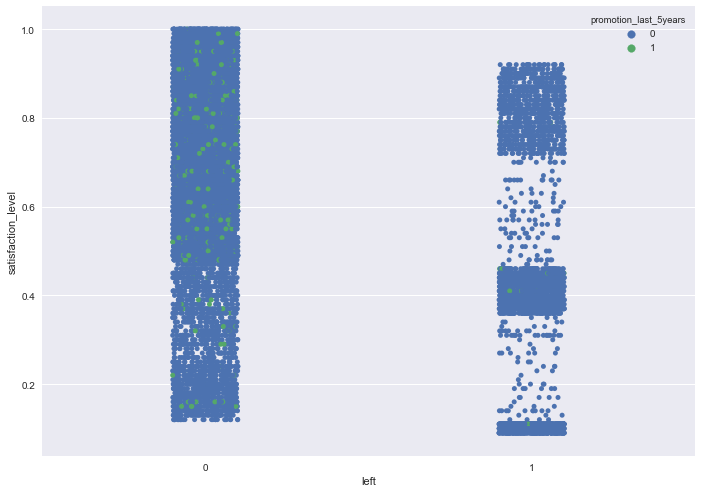

In [77]:
df['per_day_hours'] = df['average_montly_hours']/20
sns.stripplot(x = 'left',y ='satisfaction_level' , data = df, jitter= True, hue = 'promotion_last_5years' )
plt.show()

In [87]:
(df_left['promotion_last_5years'] == 0).sum() 

3552

In [86]:
(df_left['promotion_last_5years'] == 1 ). sum()

19